In [11]:
import numpy as np
import pandas as pd
import matplotlib
## 최소제곱법을 이용한 공부시간과 성적의 선형회귀 기울기, 절편 구하기 실습##
x=[2,4,6,8]
y=[81,93,91,97]

mx = np.mean(x)
my = np.mean(y)

#최소제곱법의 기울기 공식 
divisor = sum([(mx-i)**2 for i in x])

dividend = sum([(x[i]-mx)*(y[i]-my) for i in range(len(x))])
print(divisor)
print(dividend)

#기울기 
a = dividend/divisor
#절편
b = my - (mx*a)

print("기울기 :", a)
print("절편 : ", b)

20.0
46.0
기울기 : 2.3
절편 :  79.0


In [12]:
#######선형회귀의 평균 제곱 오차  구하기 #############################
#최소제곱법으로 기울기와 절편을 구할수 없는 경우 임의의 절편과 기울기에서 예측된 값과 
#실제값의 오차를 구해서 오차를 줄이는 방향으로 기울기,절편을 수정하기 위해
#오차 계산 
##########################################################
#임의의 기울기와 절편
a_b = [3, 76]
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x=[i[0] for i in data]
y=[i[1] for i in data]

#예측값
predict = [ a_b[0]*i+a_b[1]  for i in x]

#평균 제곱 오차
mse = np.mean([(predict[i] - y[i])**2 for i in range(len(x))])

print("평균 제곱 오차 :" , mse)


평균 제곱 오차 : 11.0


Matplotlib is building the font cache; this may take a moment.


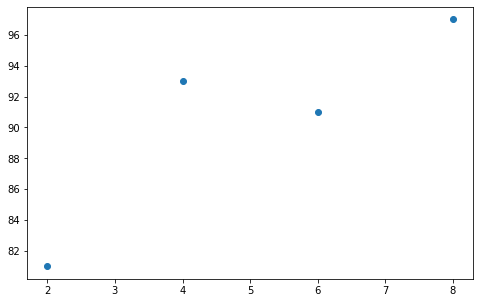

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


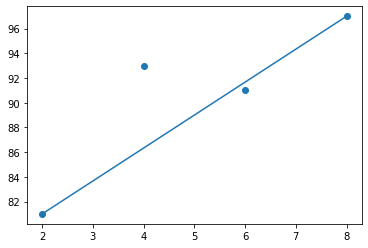

In [13]:
##############경사하강법 실습#######################
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.show()

X_data = np.array(x)
y_data = np.array(y)

a=0 #기울기 a를 0으로 초기화
b=0 #절편 b를 0으로 초기화

lr = 0.03        #학습률 
epochs = 2001

 
for i in range(epochs):
    y_pred = a * X_data + b  #이차함수의 한 점에서의 순간 기울기
    error = y_data - y_pred    #오차
    #오차 함수를 a로 미분
    a_diff = -(2/len(X_data)) * sum(X_data *(error))
    #오차 함수를 b로 미분
    b_diff = -(2/len(X_data)) * sum(error)
    #학습률을 곱해서 a값 업데이트
    a= a-lr*a_diff 
    #학습률을 곱해서 b값 업데이트
    b= b-lr*b_diff   
 
    if i%100==0: 
         print('epoch=%.f, 기울기=%.04f, 절편=%.04f' % (i, a, b))

y_pred = a * X_data + b
 
plt.scatter(x, y)
plt.plot([min(X_data), max(X_data)], [min(y_data), max(y_data)])
plt.show()

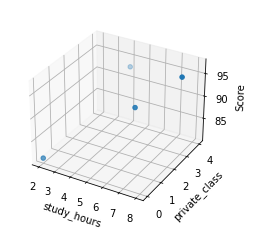

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

 
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

 
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11 
ax.scatter(x1, x2, y)
plt.show()

In [15]:
#x와 y값을 넘파이 배열로 변환
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)
# 기울기 a와 절편 b의 값을 초기화  
a1 = 0
a2 = 0
b = 0
#학습률 
lr = 0.03 
#수행 횟수
epochs = 2001 
#경사 하강법 수행
for i in range(epochs):  
    y_pred = a1 * x1_data + a2 * x2_data + b   
    error = y_data - y_pred  #오차 
    a1_diff = -(1/len(x1_data)) * sum(x1_data * (error)) # 오차함수를 a1로 미분한 값  
    a2_diff = -(1/len(x2_data)) * sum(x2_data * (error)) # 오차함수를 a2로 미분한 값  
    b_new = -(1/len(x1_data)) * sum(y_data - y_pred)  # 오차함수를 b로 미분한 값  
    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1값을 업데이트 
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2값을 업데이트 
    b = b - lr * b_new  # 학습률을 곱해 기존의 b값을 업데이트 
    if i % 100 == 0:    # 100번 반복될 때마다 현재의 a1, a2, b값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0, 기울기1=13.9200, 기울기2=6.3375, 절편=2.7150
epoch=100, 기울기1=8.3148, 기울기2=4.6327, 절편=31.0827
epoch=200, 기울기1=5.7281, 기울기2=3.7455, 절편=48.8273
epoch=300, 기울기1=4.1241, 기울기2=3.1917, 절편=59.8402
epoch=400, 기울기1=3.1286, 기울기2=2.8480, 절편=66.6752
epoch=500, 기울기1=2.5108, 기울기2=2.6347, 절편=70.9172
epoch=600, 기울기1=2.1273, 기울기2=2.5023, 절편=73.5500
epoch=700, 기울기1=1.8893, 기울기2=2.4201, 절편=75.1840
epoch=800, 기울기1=1.7416, 기울기2=2.3691, 절편=76.1981
epoch=900, 기울기1=1.6500, 기울기2=2.3375, 절편=76.8275
epoch=1000, 기울기1=1.5931, 기울기2=2.3179, 절편=77.2181
epoch=1100, 기울기1=1.5578, 기울기2=2.3057, 절편=77.4605
epoch=1200, 기울기1=1.5359, 기울기2=2.2981, 절편=77.6110
epoch=1300, 기울기1=1.5223, 기울기2=2.2934, 절편=77.7044
epoch=1400, 기울기1=1.5138, 기울기2=2.2905, 절편=77.7623
epoch=1500, 기울기1=1.5086, 기울기2=2.2887, 절편=77.7983
epoch=1600, 기울기1=1.5053, 기울기2=2.2876, 절편=77.8206
epoch=1700, 기울기1=1.5033, 기울기2=2.2869, 절편=77.8345
epoch=1800, 기울기1=1.5020, 기울기2=2.2864, 절편=77.8431
epoch=1900, 기울기1=1.5013, 기울기2=2.2862, 절편=77.8484
epoch=2000, 기울기1=1.5008, 기울기2=2.

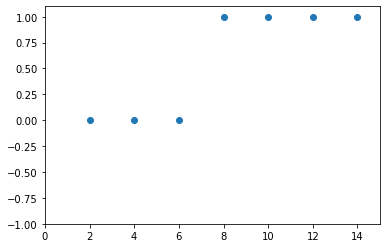

In [16]:
####################### 시그모이드 함수 #######################
data =[[2, 0], [4, 0],[6, 0],[8, 1],[10, 1],[12, 1], [14, 1]]
x=[i[0] for i in data]
y=[i[1] for i in data]

plt.scatter(x, y)
plt.xlim(0, 15)
plt.ylim(-1, 1.1)
plt.show()

In [17]:
#학습률 
lr = 0.05

#시그모이드 함수 정의 1/(1+np.e ** (-x))
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

#경사 하강법  실행 
for i in range(2001):
    for x_data, y_data in data:
        a_diff = x_data*(sigmoid(a*x_data + b) - y_data) 
        b_diff = sigmoid(a*x_data + b) - y_data
        a = a - lr * a_diff
        b = b - lr * b_diff
        if i % 1000 == 0:     
            print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=2.2000, 절편=77.8017
epoch=0, 기울기=2.0000, 절편=77.7517
epoch=0, 기울기=1.7000, 절편=77.7017
epoch=0, 기울기=1.7000, 절편=77.7017
epoch=0, 기울기=1.7000, 절편=77.7017
epoch=0, 기울기=1.7000, 절편=77.7017
epoch=0, 기울기=1.7000, 절편=77.7017
epoch=1000, 기울기=0.8760, 절편=-5.1725
epoch=1000, 기울기=0.8443, 절편=-5.1805
epoch=1000, 기울기=0.7029, 절편=-5.2040
epoch=1000, 기울기=0.8616, 절편=-5.1842
epoch=1000, 기울기=0.8772, 절편=-5.1826
epoch=1000, 기울기=0.8801, 절편=-5.1824
epoch=1000, 기울기=0.8807, 절편=-5.1824
epoch=2000, 기울기=1.6110, 절편=-10.7813
epoch=2000, 기울기=1.6085, 절편=-10.7819
epoch=2000, 기울기=1.5353, 절편=-10.7941
epoch=2000, 기울기=1.6090, 절편=-10.7849
epoch=2000, 기울기=1.6114, 절편=-10.7847
epoch=2000, 기울기=1.6115, 절편=-10.7847
epoch=2000, 기울기=1.6116, 절편=-10.7847


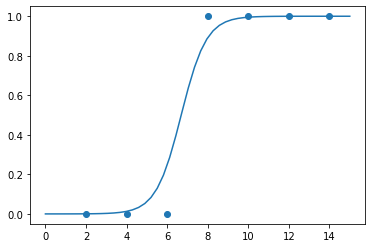

In [18]:
plt.scatter(x, y)
x = np.linspace(0,15)
plt.plot(x, sigmoid(a*x + b))
plt.show()

In [19]:
#############keras를 이용한  BMI  신경망 학습 ####################
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import pandas as pd, numpy as np
 
csv = pd.read_csv("./dataset/bmi.csv")
# 몸무게와 키 데이터 정규화
csv["weight"] /= 100
csv["height"] /= 200
X = csv[["weight", "height"]].values

# 레이블
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000,3))
for i, v in enumerate(csv["label"]):
    y[i] = bclass[v]
	
# 훈련  데이터와 테스트  데이터로 분리  
X_train, y_train = X[1:15001], y[1:15001]
X_test,  y_test  = X[15001:20001], y[15001:20001] 

In [20]:
# 모델 구조 정의   
model = Sequential()
model.add(Dense(512, input_shape=(2,)))
model.add(Activation('relu')) 

model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Activation('softmax'))

# 모델 구축 
model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['accuracy'])
# 데이터 훈련
hist = model.fit(
    X_train, y_train,
    batch_size=100,
    nb_epoch=20,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=2)],
    verbose=1)

# 테스트 데이터로 평가  
score = model.evaluate(X_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])

C:\Users\student\anaconda3\envs\mypy\lib\site-packages\ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 13500 samples, validate on 1500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 106us/step - loss: 0.5250 - accuracy: 0.7862 - val_loss: 0.3234 - val_accuracy: 0.8713
Epoch 2/20
13500/13500 [==============================] - 1s 90us/step - loss: 0.2528 - accuracy: 0.9006 - val_loss: 0.1676 - val_accuracy: 0.9467
Epoch 3/20
13500/13500 [==============================] - 1s 90us/step - loss: 0.1883 - accuracy: 0.9224 - val_loss: 0.1463 - val_accuracy: 0.9373
Epoch 4/20
13500/13500 [==============================] - 1s 91us/step - loss: 0.1676 - accuracy: 0.9285 - val_loss: 0.1101 - val_accuracy: 0.9633
Epoch 5/20
13500/13500 [==============================] - 1s 95us/step - loss: 0.1462 - accuracy: 0.9376 - val_loss: 0.1754 - val_accuracy: 0.9073
Epoch 6/20
4999/4999 [==============================] - 0s 67us/step
loss= 0.2208049290864366
accuracy= 0.8897779583930969


In [21]:
############ XOR 문제 코드 구현 #############
#XOR을 위해선 n1에는 NAND, n2에는 OR 마지막으로 AND를 거쳐야 함
#weight
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
#bias
b1 = 3
b2 = -1
b3 = -1

def MLP(x, w, b):
    y = np.sum(w*x) + b
    if y <= 0:
        return 0
    else:
        return 1

#x1과 x2가 n1으로 가는 방향
def NAND(x1, x2):
    return MLP(np.array([x1,x2]), w11, b1)

#x1과 x2가 n2로 가는 방향
def OR(x1, x2):
    return MLP(np.array([x1,x2]), w12, b2)

#n1과 n2가마지막 y_out으로 가는 방향
def AND(x1, x2):
    return MLP(np.array([x1,x2]), w2, b3)

#위 단계를 모두 합친 것
def XOR(x1, x2):
    return AND(NAND(x1,x2), OR(x1,x2))

for x in [(0,0),(1,0),(0,1),(1,1)]:
    y = XOR(x[0], x[1])
    print('입력값: ' + str(x) + ' 출력값: ' + str(y))

입력값: (0, 0) 출력값: 0
입력값: (1, 0) 출력값: 1
입력값: (0, 1) 출력값: 1
입력값: (1, 1) 출력값: 0


In [30]:
######## 폐암 수술 환자의 생존율 예측 ##########
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import tensorflow as tf

#실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

#수술 환자 데이터 로드
Data_set = np.loadtxt('./dataset/ThoraricSurgery.csv', delimiter=',')
#마지막 열이 생존 여부, label로 분리해줌
X = Data_set[:,:-1]
Y = Data_set[:, -1]

print(len(X[0][:]))
#17

model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
#활성화 함수는 relu로, features가 17개이므로 입력은 17
model.add(Dense(1, activation='sigmoid'))
#출력 부분, 출력 뉴런은 하나면 되고 결과는 0 혹은 1이므로 Sigmoid

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#손실 함수 loss는 오차 계산에 쓰임, 경사 하강 기법은 adam 모멘텀과 알엠에스프롭 합친 걸 사용

model.fit(X, Y, epochs=100, batch_size=10)
#epochs 는 전체 데이터 셋에 대한 학습(forward pass + backward pass) 수?
#메모리 한계와 속도 저하 때문에 한 번의 epoch에서 모든 데이터를 한 번에 집어넣을 수 없음
#따라서 데이터를 나누어 집어넣는데 이때 몇번 나누는가를 iteration, 각 iteration마다 주는 데이터 사이즈를 batch_size

17
Epoch 1/100
470/470 [==============================] - 0s 564us/step - loss: 0.6615 - accuracy: 0.3149
Epoch 2/100
470/470 [==============================] - 0s 337us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 3/100
470/470 [==============================] - 0s 350us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 4/100
470/470 [==============================] - 0s 318us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 5/100
470/470 [==============================] - 0s 303us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 6/100
470/470 [==============================] - 0s 301us/step - loss: 0.1487 - accuracy: 0.8511
Epoch 7/100
470/470 [==============================] - 0s 308us/step - loss: 0.1487 - accuracy: 0.8511
Epoch 8/100
470/470 [==============================] - 0s 306us/step - loss: 0.1487 - accuracy: 0.8511
Epoch 9/100
470/470 [==============================] - 0s 303us/step - loss: 0.1487 - accuracy: 0.8511
Epoch 10/100
470/470 [==============================] - 0s 297us/step 

470/470 [==============================] - 0s 308us/step - loss: 0.1456 - accuracy: 0.8511
Epoch 80/100
470/470 [==============================] - 0s 291us/step - loss: 0.1417 - accuracy: 0.8553
Epoch 81/100
470/470 [==============================] - 0s 284us/step - loss: 0.1402 - accuracy: 0.8596
Epoch 82/100
470/470 [==============================] - 0s 318us/step - loss: 0.1401 - accuracy: 0.8574
Epoch 83/100
470/470 [==============================] - 0s 286us/step - loss: 0.1414 - accuracy: 0.8553
Epoch 84/100
470/470 [==============================] - 0s 293us/step - loss: 0.1420 - accuracy: 0.8532
Epoch 85/100
470/470 [==============================] - 0s 289us/step - loss: 0.1398 - accuracy: 0.8574
Epoch 86/100
470/470 [==============================] - 0s 293us/step - loss: 0.1400 - accuracy: 0.8574
Epoch 87/100
470/470 [==============================] - 0s 297us/step - loss: 0.1403 - accuracy: 0.8574
Epoch 88/100
470/470 [==============================] - 0s 295us/step - loss:

In [5]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [ ]:
#pip install --user --upgrade tensorboard==2.2.0

In [ ]:
#https://stackoverflow.com/questions/62465620/error-keras-requires-tensorflow-2-2-or-higher